In [1]:
# 필요한 패키지를 읽어들임. 
import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import rdkit
import rdkit.Chem as Chem

In [3]:
drugs = pd.read_csv("drugs.csv")
drugs

,smiles,is_drug
0,BrC1=CC2=C(NC(=O)CN=C2C2=CC=CC=N2)C=C1,1
1,C#CCN[C@@H]1CCC2=CC=CC=C12,1
2,C1(CC[C@@]2([C@@H](CC(N)=O)[C@@]3([C@@]4([N+]5...,1
3,C1C2CNCC1C1=C2C=C2N=CC=NC2=C1,1
4,C1CN2C[C@@H](N=C2S1)C1=CC=CC=C1,1
...,...,...
595,CO[C@H]1[C@H](O)CC(=O)O[C@H](C)C\C=C\C=C\[C@H]...,1
596,CO[C@H]1\C=C\O[C@@]2(C)OC3=C(C)C(O)=C4C(O)=C(N...,1
597,CO[C@H]1\C=C\O[C@@]2(C)OC3=C(C)C(O)=C4C(O)=C(N...,1
598,CO[C@H]1\C=C\O[C@@]2(C)OC3=C(C2=O)C2=C(C(O)=C3...,1


In [4]:
non_drugs = pd.read_csv("non_drugs.csv")
non_drugs

,smiles,is_drug
0,CC1CCCCN1CCCNCC2(COC2)C,0
1,CCCC1CCC2=C(C1)SC(=N2)NC(=O)CCNC,0
2,CN1C(=C(C(=N1)C2=CC(=CN=C2)F)C3=CC=CC=C3Cl)N,0
3,CCCCCCCCCCCC(C)COC(=O)C(=C)C,0
4,CCCC(CNC)N1CCN(CC1)C2=CC(=CC=C2)OC,0
...,...,...
994,CC1=CC=CC=C1NC(=O)C2=C(C=CC(=C2)NC(=O)C(C)N3CC...,0
995,CC1=C(C(=CC(=C1)Br)C(=O)NC(=S)NC2=C(C(=CC=C2)[...,0
996,CC(C)(C)OC(=O)N1CCOC(C(C1)C2=CC(=C(C=C2)Cl)Cl)CO,0
997,CCCCCCCCCCCC=COC(=O)C1=C(C(=CC=C1)S(=O)(=O)[O-...,0


In [5]:
# 분자들의 특징을 뽑아내자. 
from rdkit.Chem.rdMolDescriptors import CalcExactMolWt, CalcCrippenDescriptors, CalcNumLipinskiHBA, CalcNumLipinskiHBD

mw = []
hba = []
hbd = []
logp = []
 
for smi in drugs["smiles"]:
    m = Chem.MolFromSmiles(smi)
    mw.append(CalcExactMolWt(m))
    logp.append(CalcCrippenDescriptors(m)[0]) # because calccrippendescriptors returns two values: logp, mr
    hba.append(CalcNumLipinskiHBA(m))
    hbd.append(CalcNumLipinskiHBD(m))

In [6]:
mw

[315.00072404,
 171.104799416,
 1343.5878012219998,
 211.110947416,
 204.072119384,
 86.08439831999999,
 140.106196384,
 465.19132297600004,
 472.2335221360001,
 447.23827316800003,
 324.11437811999997,
 353.08993719999995,
 308.104858992,
 309.07832696,
 820.880323412,
 530.148760736,
 613.769650768,
 151.063328528,
 221.988132052,
 181.040878832,
 337.14378433999997,
 75.0320284,
 163.030314148,
 373.11479271999997,
 361.13140808800006,
 307.026291388,
 180.042258736,
 321.143704088,
 370.101230156,
 296.116092372,
 254.094294308,
 244.089957876,
 242.094294308,
 260.050715244,
 293.16404560800004,
 226.110613068,
 501.287908728,
 501.198849614,
 234.125594436,
 392.20999275599996,
 471.313729552,
 519.10105154,
 613.3628049839999,
 239.152143532,
 225.136493468,
 240.1473925,
 309.194008344,
 239.152143532,
 291.21982916800005,
 344.2562742519999,
 219.110672644,
 474.23793882,
 149.12044948,
 473.13987748400007,
 318.06588664,
 361.1080857999999,
 516.309572776,
 276.07217687200006

In [7]:
drugs["MW"] = mw 

In [8]:
drugs["MW"] = mw 
drugs["HBA"] = hba
drugs["HBD"] = hbd
drugs["logp"] = logp

In [9]:
drugs

,smiles,is_drug,MW,HBA,HBD,logp
0,BrC1=CC2=C(NC(=O)CN=C2C2=CC=CC=N2)C=C1,1,315.000724,4,1,2.63360
1,C#CCN[C@@H]1CCC2=CC=CC=C12,1,171.104799,1,1,1.89670
2,C1(CC[C@@]2([C@@H](CC(N)=O)[C@@]3([C@@]4([N+]5...,1,1343.587801,27,15,0.92454
3,C1C2CNCC1C1=C2C=C2N=CC=NC2=C1,1,211.110947,3,1,1.80390
4,C1CN2C[C@@H](N=C2S1)C1=CC=CC=C1,1,204.072119,2,0,2.14610
...,...,...,...,...,...,...
595,CO[C@H]1[C@H](O)CC(=O)O[C@H](C)C\C=C\C=C\[C@H]...,1,842.514005,16,4,2.32510
596,CO[C@H]1\C=C\O[C@@]2(C)OC3=C(C)C(O)=C4C(O)=C(N...,1,785.352359,14,5,6.15784
597,CO[C@H]1\C=C\O[C@@]2(C)OC3=C(C)C(O)=C4C(O)=C(N...,1,697.309826,13,6,4.75412
598,CO[C@H]1\C=C\O[C@@]2(C)OC3=C(C2=O)C2=C(C(O)=C3...,1,846.441509,15,5,4.61572


In [10]:
mw = []
hba = []
hbd = []
logp = []
 
for smi in non_drugs["smiles"]:
    m = Chem.MolFromSmiles(smi)
    mw.append(CalcExactMolWt(m))
    logp.append(CalcCrippenDescriptors(m)[0]) # because calccrippendescriptors returns two values: logp, mr
    hba.append(CalcNumLipinskiHBA(m))
    hbd.append(CalcNumLipinskiHBD(m))

In [11]:
non_drugs["MW"] = mw
non_drugs["HBA"] = hba
non_drugs["HBD"] = hbd
non_drugs["logp"] = logp

In [12]:
non_drugs

,smiles,is_drug,MW,HBA,HBD,logp
0,CC1CCCCN1CCCNCC2(COC2)C,0,240.220164,3,1,1.87700
1,CCCC1CCC2=C(C1)SC(=N2)NC(=O)CCNC,0,281.156183,4,2,2.59610
2,CN1C(=C(C(=N1)C2=CC(=CN=C2)F)C3=CC=CC=C3Cl)N,0,302.073452,4,2,3.52380
3,CCCCCCCCCCCC(C)COC(=O)C(=C)C,0,282.255880,2,0,5.66270
4,CCCC(CNC)N1CCN(CC1)C2=CC(=CC=C2)OC,0,291.231063,4,1,2.20530
...,...,...,...,...,...,...
994,CC1=CC=CC=C1NC(=O)C2=C(C=CC(=C2)NC(=O)C(C)N3CC...,0,674.298346,11,6,5.12654
995,CC1=C(C(=CC(=C1)Br)C(=O)NC(=S)NC2=C(C(=CC=C2)[...,0,437.004489,7,2,4.10954
996,CC(C)(C)OC(=O)N1CCOC(C(C1)C2=CC(=C(C=C2)Cl)Cl)CO,0,375.100414,5,1,3.70520
997,CCCCCCCCCCCC=COC(=O)C1=C(C(=CC=C1)S(=O)(=O)[O-...,0,1250.664991,14,0,19.16620


In [13]:
drugs

,smiles,is_drug,MW,HBA,HBD,logp
0,BrC1=CC2=C(NC(=O)CN=C2C2=CC=CC=N2)C=C1,1,315.000724,4,1,2.63360
1,C#CCN[C@@H]1CCC2=CC=CC=C12,1,171.104799,1,1,1.89670
2,C1(CC[C@@]2([C@@H](CC(N)=O)[C@@]3([C@@]4([N+]5...,1,1343.587801,27,15,0.92454
3,C1C2CNCC1C1=C2C=C2N=CC=NC2=C1,1,211.110947,3,1,1.80390
4,C1CN2C[C@@H](N=C2S1)C1=CC=CC=C1,1,204.072119,2,0,2.14610
...,...,...,...,...,...,...
595,CO[C@H]1[C@H](O)CC(=O)O[C@H](C)C\C=C\C=C\[C@H]...,1,842.514005,16,4,2.32510
596,CO[C@H]1\C=C\O[C@@]2(C)OC3=C(C)C(O)=C4C(O)=C(N...,1,785.352359,14,5,6.15784
597,CO[C@H]1\C=C\O[C@@]2(C)OC3=C(C)C(O)=C4C(O)=C(N...,1,697.309826,13,6,4.75412
598,CO[C@H]1\C=C\O[C@@]2(C)OC3=C(C2=O)C2=C(C(O)=C3...,1,846.441509,15,5,4.61572


In [14]:
non_drugs

,smiles,is_drug,MW,HBA,HBD,logp
0,CC1CCCCN1CCCNCC2(COC2)C,0,240.220164,3,1,1.87700
1,CCCC1CCC2=C(C1)SC(=N2)NC(=O)CCNC,0,281.156183,4,2,2.59610
2,CN1C(=C(C(=N1)C2=CC(=CN=C2)F)C3=CC=CC=C3Cl)N,0,302.073452,4,2,3.52380
3,CCCCCCCCCCCC(C)COC(=O)C(=C)C,0,282.255880,2,0,5.66270
4,CCCC(CNC)N1CCN(CC1)C2=CC(=CC=C2)OC,0,291.231063,4,1,2.20530
...,...,...,...,...,...,...
994,CC1=CC=CC=C1NC(=O)C2=C(C=CC(=C2)NC(=O)C(C)N3CC...,0,674.298346,11,6,5.12654
995,CC1=C(C(=CC(=C1)Br)C(=O)NC(=S)NC2=C(C(=CC=C2)[...,0,437.004489,7,2,4.10954
996,CC(C)(C)OC(=O)N1CCOC(C(C1)C2=CC(=C(C=C2)Cl)Cl)CO,0,375.100414,5,1,3.70520
997,CCCCCCCCCCCC=COC(=O)C1=C(C(=CC=C1)S(=O)(=O)[O-...,0,1250.664991,14,0,19.16620


In [15]:
all_data = pd.concat([drugs, non_drugs], ignore_index=True)

In [16]:
all_data

,smiles,is_drug,MW,HBA,HBD,logp
0,BrC1=CC2=C(NC(=O)CN=C2C2=CC=CC=N2)C=C1,1,315.000724,4,1,2.63360
1,C#CCN[C@@H]1CCC2=CC=CC=C12,1,171.104799,1,1,1.89670
2,C1(CC[C@@]2([C@@H](CC(N)=O)[C@@]3([C@@]4([N+]5...,1,1343.587801,27,15,0.92454
3,C1C2CNCC1C1=C2C=C2N=CC=NC2=C1,1,211.110947,3,1,1.80390
4,C1CN2C[C@@H](N=C2S1)C1=CC=CC=C1,1,204.072119,2,0,2.14610
...,...,...,...,...,...,...
1594,CC1=CC=CC=C1NC(=O)C2=C(C=CC(=C2)NC(=O)C(C)N3CC...,0,674.298346,11,6,5.12654
1595,CC1=C(C(=CC(=C1)Br)C(=O)NC(=S)NC2=C(C(=CC=C2)[...,0,437.004489,7,2,4.10954
1596,CC(C)(C)OC(=O)N1CCOC(C(C1)C2=CC(=C(C=C2)Cl)Cl)CO,0,375.100414,5,1,3.70520
1597,CCCCCCCCCCCC=COC(=O)C1=C(C(=CC=C1)S(=O)(=O)[O-...,0,1250.664991,14,0,19.16620


# Support Vector Machine (SVM)

Random Forest, Neural Net 과 더불어 가장 많이 사용되는 ML 기법. 

## 장점
* 고차원 데이터에서 잘 작동함. 
* 데이터 숫자보다 feature dimension이 클 때에도 효과적임. 
* 메모리를 많이 필요로 하지 않음. 

## 개념
### 고차원에서 두개의 그룹을 가장 넓게 분리하는 가상의 평면(선)을 찾아내는 방법이다. 

* 각 그룹에서 가상의 구분선까지의 길이(거리)가 가장 짧은 데이터를 **support vector** 라고 부른다. 

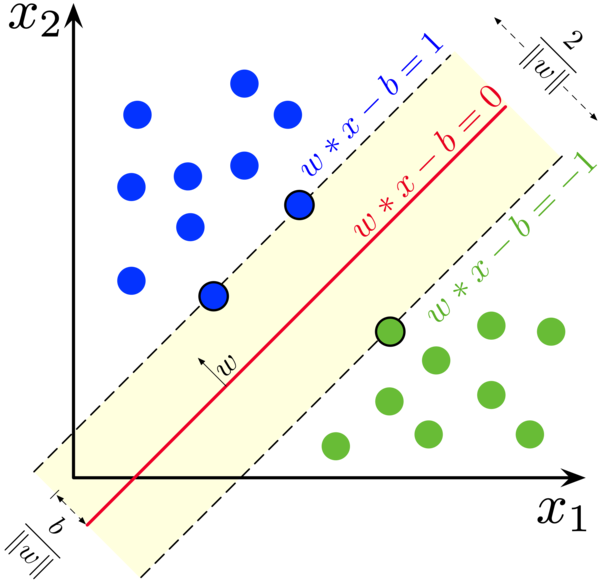

* 구분선을 선형(직선, linear)로 할 수도 있고, 곡선(non-linear)으로 할 수도 있다. 
* 이것을 결정해주기 위해서는 kernel(core, 핵심)을 바꾸면 된다. 

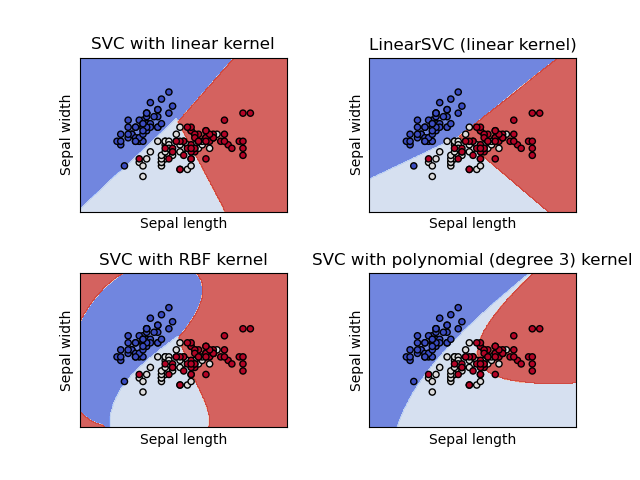


* 마크다운 사용법: https://gist.github.com/ihoneymon/652be052a0727ad59601

## Support vector machine을 사용해보자!

* scikit-learn에서 svm 모듈을 읽어오자. 

In [17]:
from sklearn import svm 

## SVM 기반의 구별 모델을 하나 생성하자!
* svm.SVC() 
* support vector classifier

In [18]:
my_model = svm.SVC()

## 전체 데이터를 분리하자. 

In [19]:
from sklearn.model_selection import train_test_split # train_test_split 함수를 불러오자. 

In [20]:
all_data

,smiles,is_drug,MW,HBA,HBD,logp
0,BrC1=CC2=C(NC(=O)CN=C2C2=CC=CC=N2)C=C1,1,315.000724,4,1,2.63360
1,C#CCN[C@@H]1CCC2=CC=CC=C12,1,171.104799,1,1,1.89670
2,C1(CC[C@@]2([C@@H](CC(N)=O)[C@@]3([C@@]4([N+]5...,1,1343.587801,27,15,0.92454
3,C1C2CNCC1C1=C2C=C2N=CC=NC2=C1,1,211.110947,3,1,1.80390
4,C1CN2C[C@@H](N=C2S1)C1=CC=CC=C1,1,204.072119,2,0,2.14610
...,...,...,...,...,...,...
1594,CC1=CC=CC=C1NC(=O)C2=C(C=CC(=C2)NC(=O)C(C)N3CC...,0,674.298346,11,6,5.12654
1595,CC1=C(C(=CC(=C1)Br)C(=O)NC(=S)NC2=C(C(=CC=C2)[...,0,437.004489,7,2,4.10954
1596,CC(C)(C)OC(=O)N1CCOC(C(C1)C2=CC(=C(C=C2)Cl)Cl)CO,0,375.100414,5,1,3.70520
1597,CCCCCCCCCCCC=COC(=O)C1=C(C(=CC=C1)S(=O)(=O)[O-...,0,1250.664991,14,0,19.16620


**분자의 feature는 3번째 열(column)부터 끝까지이다.**

**그러므로 입력데이터는 (전체 행, 3번째 열부터 마지막 열까지)에 해당한다.**

In [21]:
X = all_data.iloc[:, 2:] # all_data 에서 전체 행 & 3번째 열~마지막열

In [22]:
X

,MW,HBA,HBD,logp
0,315.000724,4,1,2.63360
1,171.104799,1,1,1.89670
2,1343.587801,27,15,0.92454
3,211.110947,3,1,1.80390
4,204.072119,2,0,2.14610
...,...,...,...,...
1594,674.298346,11,6,5.12654
1595,437.004489,7,2,4.10954
1596,375.100414,5,1,3.70520
1597,1250.664991,14,0,19.16620


In [23]:
X.describe()

,MW,HBA,HBD,logp
count,1599.000000,1599.000000,1599.000000,1599.000000
mean,367.913854,5.474672,1.649156,3.204952
std,171.423652,3.889809,2.167021,2.094249
min,46.041865,0.000000,0.000000,-11.627860
25%,270.107745,3.500000,1.000000,1.981650
50%,340.201159,5.000000,1.000000,3.115400
75%,431.188003,7.000000,2.000000,4.292950
max,4111.115377,104.000000,61.000000,19.166200


## 목적 값 (y)는 is_drug 이라는 이름을 가진 열에 해당!

In [24]:
y = all_data["is_drug"] # all_data 의 is_drug의 열

In [25]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: is_drug, Length: 1599, dtype: int64

## SVM은 preprocessing이 필요하다!
* preprocessing = 전처리. 
* SVM의 경우, Feature (X)의 절대값이 너무 차이가 나면 잘 작동하지 않는다. 
* 그러므로, 전체 값을 표준화 하여야 한다. (수능의 표준점수를 생각해보자!)
* 가장 기본이 되는 **정규분포**의 경우. 
* 표준점수 = (원점수 - 평균) / 표준편차 
* scikit-learn에 미리 구현되어 있다. 
* https://scikit-learn.org/stable/modules/preprocessing.html

In [26]:
from sklearn import preprocessing
min_max_scaler = preprocessing.StandardScaler() # 정규분포로 바꾸어 준다 (표준 점수로 바꾸어 준다.)
X_scaled = min_max_scaler.fit_transform(X) # fit_transform이라고 하는 메소드 사용!

### 보정된 값을 확인해보자!

In [27]:
X_scaled

array([[-0.30876535, -0.37923017, -0.29965505, -0.27290473],
       [-1.14844493, -1.15071749, -0.29965505, -0.62488325],
       [ 5.69337527,  5.535506  ,  6.16284785, -1.08923314],
       ...,
       [ 0.04193592, -0.12206773, -0.29965505,  0.23894243],
       [ 5.1511404 ,  2.19239425, -0.7612624 ,  7.62385195],
       [ 0.87709524,  0.39225716, -0.29965505,  1.06875961]])

In [28]:
X_scaled_df = pd.DataFrame(X_scaled)

In [29]:
X_scaled_df

,0,1,2,3
0,-0.308765,-0.379230,-0.299655,-0.272905
1,-1.148445,-1.150717,-0.299655,-0.624883
2,5.693375,5.535506,6.162848,-1.089233
3,-0.914996,-0.636393,-0.299655,-0.669209
4,-0.956070,-0.893555,-0.761262,-0.505758
...,...,...,...,...
1594,1.787853,1.420907,2.008382,0.917842
1595,0.403166,0.392257,0.161952,0.432074
1596,0.041936,-0.122068,-0.299655,0.238942
1597,5.151140,2.192394,-0.761262,7.623852


In [30]:
X_scaled_df.describe()

,0,1,2,3
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,-2.246830e-16,1.041485e-18,3.604580e-16,4.985242e-17
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-1.878228e+00,-1.407880e+00,-7.612624e-01,-7.084857e+00
25%,-5.707305e-01,-5.078114e-01,-2.996551e-01,-5.843071e-01
50%,-1.617126e-01,-1.220677e-01,-2.996551e-01,-4.277412e-02
75%,3.692253e-01,3.922572e-01,1.619523e-01,5.196798e-01
max,2.184280e+01,2.533701e+01,2.739679e+01,7.623852e+00


X 에 있는 값들이 평균 0, 표준편차 1을 가지는 값으로 표준화 되었다!

In [31]:
y = all_data["is_drug"]

In [32]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: is_drug, Length: 1599, dtype: int64

## training / test set 나누기!
* train_test_split 사용할 때, 순서에 유의!

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2) # 20%의 데이터만 테스트용으로 사용. 

In [34]:
X_train

,0,1,2,3
1377,-0.285095,-0.893555,-0.299655,0.415538
610,0.350900,0.392257,-0.299655,0.150243
281,-0.600019,-0.122068,0.161952,0.018317
968,-0.395486,-0.893555,-0.761262,0.543596
336,0.398057,0.392257,1.085167,-0.882908
...,...,...,...,...
852,-0.429931,-0.636393,-0.761262,0.569761
1360,-1.031585,-0.893555,-0.299655,0.092352
1146,-0.512214,-0.122068,1.085167,-1.106973
1111,-0.371981,-0.379230,-0.761262,0.228434


In [35]:
X_test

,0,1,2,3
453,-0.599614,-0.636393,-0.761262,-0.346797
1254,-0.191987,-0.122068,-0.299655,-1.212151
1260,0.339893,0.135095,-0.761262,-0.173267
479,-0.611230,-1.150717,-0.299655,0.523955
1464,-0.108923,0.392257,0.161952,-0.765312
...,...,...,...,...
1503,0.315549,0.135095,-0.299655,0.755361
208,-1.306411,-1.150717,-0.299655,-0.808061
326,0.345701,0.392257,-0.299655,0.430670
729,-0.203389,-0.636393,-0.299655,0.529027


In [36]:
y_train

1377    0
610     0
281     1
968     0
336     1
       ..
852     0
1360    0
1146    0
1111    0
1087    0
Name: is_drug, Length: 1279, dtype: int64

In [37]:
y_test

453     1
1254    0
1260    0
479     1
1464    0
       ..
1503    0
208     1
326     1
729     0
550     1
Name: is_drug, Length: 320, dtype: int64

## 실제 학습을 시키자!

In [38]:
my_model.fit(X_train, y_train)

SVC()

에러 메세지 없으면 학습이 잘 되었음!

## 학습이 잘 되었는지 테스트!
* test set을 predict에 집어넣어준다. 

In [39]:
y_pred = my_model.predict(X_test)

In [40]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## 예측 결과를 평가하자!
* precision score
* recall score
* f1 score
* sklearn.metrics에서 가져오자!

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

### 정확도 (precision)

In [42]:
precision_score(y_test, y_pred) # (true, pred)

0.7333333333333333

65.6%의 정확도를 가지고 예측되었다. 

약이라고 예측한 것 중에 65.6%가 맞았다. 

### 재현도 (recall)

In [43]:
recall_score(y_test, y_pred)

0.088

실제 drug 중에서 19.4%만 제대로 찾았다. 

80%의 실제 drug을 drug이 아니라고 예측하였다. 

너무 많이 놓쳤다. 

### f1-score 계산
* precision과 recall의 조화평균. 

In [44]:
f1_score(y_test, y_pred)

0.15714285714285717

## 성능을 향상시키기 위해서 다른 커널을 사용해보자!

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

## 성능 향상을 위해서 더 많은 feature를 고려할 수 있다!
rdkit에서 사용가능한 descriptors
* https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html